# Cell Segmentation Analysis
In this notebook, we will perform segmentation of cells from a microscopy image using background subtraction and the watershed algorithm.

## Step 1: Load the Image
We will load the image located in the `../data` directory.

In [1]:
from skimage import io

# Load the image
image = io.imread('../data/membranes.png')
image.shape

(256, 256)

## Step 2: Convert Image to Grayscale
Check if the image is not already in grayscale format.

In [2]:
from skimage.color import rgb2gray

# Convert to grayscale if necessary
if len(image.shape) == 3:
    image_gray = rgb2gray(image)
else:
    image_gray = image

## Step 3: Apply White Top-Hat Filter
Use a white top-hat filter with a disk size of 10 to subtract the background.

In [3]:
from skimage import morphology

# Apply white top-hat transformation
selem = morphology.disk(10)
image_tophat = morphology.white_tophat(image_gray, selem)

## Step 4: Compute Image Gradient
Calculate image gradients using the Sobel filter.

In [4]:
from skimage import filters

# Compute gradients
gradient = filters.sobel(image_tophat)

## Step 5: Generate Markers for Watershed
Markers will be based on an Otsu thresholded version of the top-hat filtered image.

In [5]:
from scipy import ndimage as ndi

# Create markers using thresholding
markers = ndi.label(image_tophat < filters.threshold_otsu(image_tophat))[0]

## Step 6: Apply the Watershed Algorithm
Perform watershed segmentation using the computed gradient and markers.

In [6]:
from skimage import segmentation

# Apply watershed
labeled_image = segmentation.watershed(gradient, markers)

## Step 7: Remove Small Objects
Remove small objects to clean the segmented image.

In [7]:
# Clean up the segmentation
cleaned_image = morphology.remove_small_objects(labeled_image, min_size=150)

## Step 8: Measure Properties of Segmented Regions
Measure the area of each segmented region and generate a table.

In [8]:
from skimage import measure
import pandas as pd

# Measure region properties
properties = measure.regionprops_table(cleaned_image, properties=['label', 'area'])
df = pd.DataFrame(properties)
df.head()

,label,area
0,1,1952.0
1,2,753.0
2,3,15224.0
3,5,876.0
4,8,636.0


## Step 9: Display Results
Visualize the original image, the background-subtracted image, and the segmented cells.

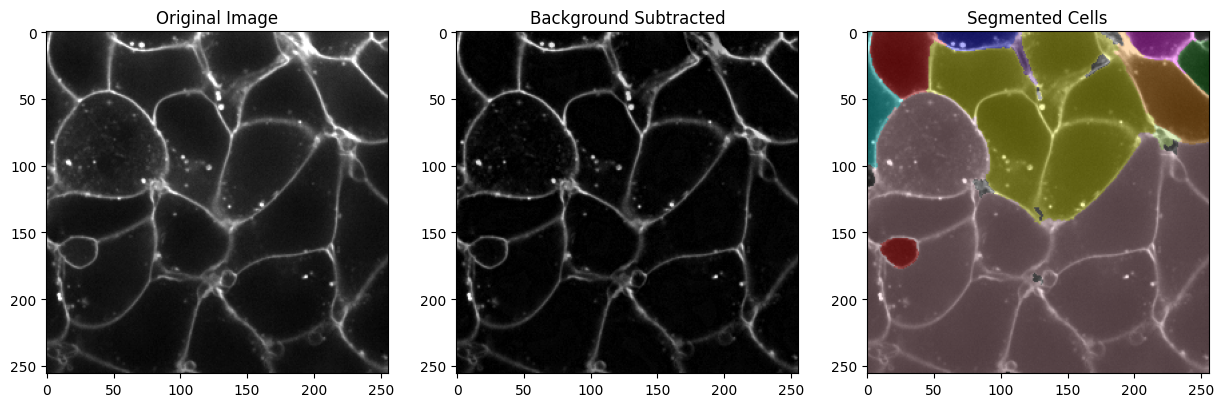

In [9]:
import matplotlib.pyplot as plt
from skimage.color import label2rgb

# Show the original, background-subtracted, and labeled images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_tophat, cmap='gray')
ax[1].set_title('Background Subtracted')
ax[2].imshow(label2rgb(cleaned_image, image=image, bg_label=0), cmap='nipy_spectral')
ax[2].set_title('Segmented Cells')
plt.show()